In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics

In [2]:
data=pd.read_csv('./../day 44 task regression/forestfires.csv')

# 1. Preprocessing: Importing and managing the datasets.

#### * First step is to know the data, their types, starting with label.

In [3]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


#### * Here in the top datasets, we can observe the features, labels and their datas. But we are still not clear about the range of area (label). So, we observe the last datasets. 

In [4]:
data.tail()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00


#### * Area can range from 0 to a large number. So, we have to keep that in mind.

In [5]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


#### * Here, from the numeric interpretation, min value of area is 0 and max is 1090.84. Table also depicts the mean to be 12.84 meaning most of the label datas we are dealing with are small numbers. Let's see a box plot to visualize the label data.

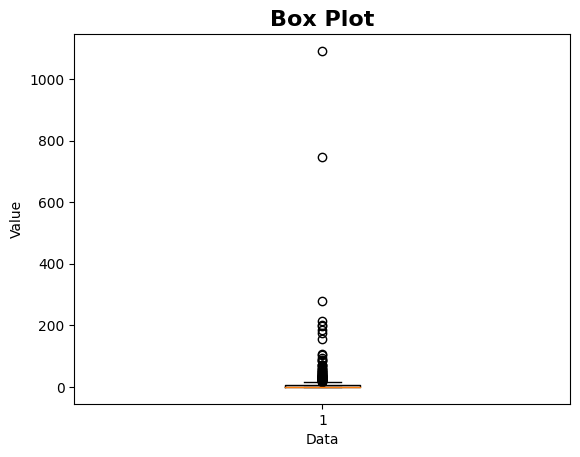

In [6]:
import matplotlib.pyplot as plt
# Create a figure and an axes object
fig, ax = plt.subplots()

# Generate the box plot
ax.boxplot(data.area)

# Customize the chart
ax.set_title('Box Plot', fontsize=16, fontweight='bold')
ax.set_xlabel('Data')
ax.set_ylabel('Value')

plt.show()

#### * This shows, most of the datas are ranging from 0 to 300 (Skewed towards 0). It's necessary to normalize the label datasets: either by removing, replacing or use a log function(this brings values close to zero without replacing its significance)

# 1.1 Data Handling of label (Type/Standardlization)

### 1.1.1 Handling outlers
Convert area interm's of log for standardlization

In [7]:
new_area=np.log(data.area+1)
data.drop(['area'],axis=1,inplace=True)
data['area']=new_area

In [8]:
data.tail()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,2.006871
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,4.012592
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,2.498152
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.000000
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.000000


#### * Here the labels are normalized. Now, after dealing with labels, lets check the status of features (datatypes).

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


#### * Checking data type numeric or not: month and day are not in numeric format. So, let's handle it.

# 1.2 Data handling of features (Type/Standardlization) 


### 1.2.1 Handling data types
Converting categorical value into numeric

In [10]:
# month and day are object, convert the into numeric
print(data.month.unique())
print(data.day.unique())

['mar' 'oct' 'aug' 'sep' 'apr' 'jun' 'jul' 'feb' 'jan' 'dec' 'may' 'nov']
['fri' 'tue' 'sat' 'sun' 'mon' 'wed' 'thu']


In [11]:
from sklearn.preprocessing import LabelEncoder
month_new=LabelEncoder().fit_transform(data['month'])
day_new=LabelEncoder().fit_transform(data.day)
scrap=['month','day']
data.drop(scrap,axis=1,inplace=True)
data['month']=month_new
data['day']=day_new

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   FFMC    517 non-null    float64
 3   DMC     517 non-null    float64
 4   DC      517 non-null    float64
 5   ISI     517 non-null    float64
 6   temp    517 non-null    float64
 7   RH      517 non-null    int64  
 8   wind    517 non-null    float64
 9   rain    517 non-null    float64
 10  area    517 non-null    float64
 11  month   517 non-null    int32  
 12  day     517 non-null    int32  
dtypes: float64(8), int32(2), int64(3)
memory usage: 48.6 KB


### 1.2.2 Handling null value
All the datasets now have numeric values. Let's check if any values are missing.

In [13]:
# Check for  null values
data.isna().sum()

X        0
Y        0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
month    0
day      0
dtype: int64

#### * Since, there are no null values and all datatypes were numeric, we can continue the next step.

### 1.2.3 Handling outlers
Outlier can be handled by:
- removing them
- replacing with appropriate value
- standardlizing whole data-sets 

#### As an example, lets see a parameter "Temperature".

In [14]:
data.shape

(517, 13)

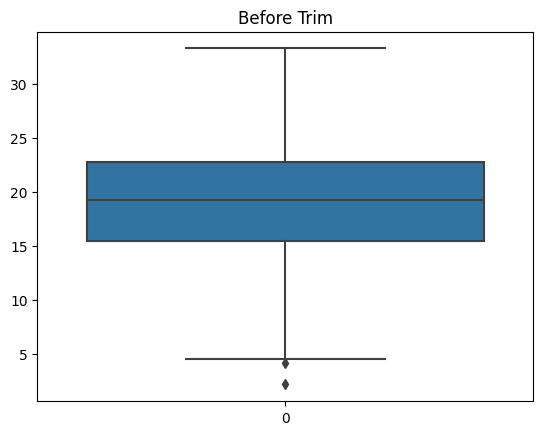

In [15]:
import seaborn as sns
sns.boxplot(data.temp)
plt.title("Before Trim")
plt.show()

#### Box-plot shows a small outlier. Following step shows to remove those outliers.

(515, 13)


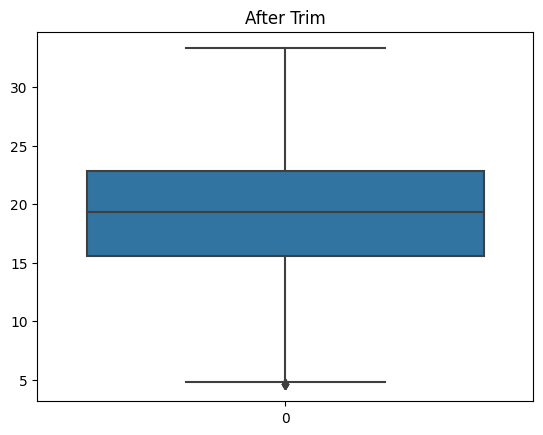

In [16]:
Q1 = data['temp'].quantile(0.25)
Q3 = data['temp'].quantile(0.75)
IQR = Q3 - Q1
data_trim = data[~((data.temp < (Q1 - 1.5 * IQR)) |(data.temp > (Q3 + 1.5 * IQR)))]
print(data_trim.shape)
sns.boxplot(data_trim.temp)
plt.title("After Trim")
plt.show()

### * Note we will be using un-trimmed dataset, as for use of trimmed dataset all the parameters must consider those trim value as outliers.

#### More information regarding data-set:

In [17]:
data.columns

Index(['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain',
       'area', 'month', 'day'],
      dtype='object')

# 2. Data Exploration: Gain information of given data (through statistic or visualization) 

array([[<Axes: title={'center': 'X'}>, <Axes: title={'center': 'Y'}>,
        <Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>],
       [<Axes: title={'center': 'DC'}>, <Axes: title={'center': 'ISI'}>,
        <Axes: title={'center': 'temp'}>, <Axes: title={'center': 'RH'}>],
       [<Axes: title={'center': 'wind'}>,
        <Axes: title={'center': 'rain'}>,
        <Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'day'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

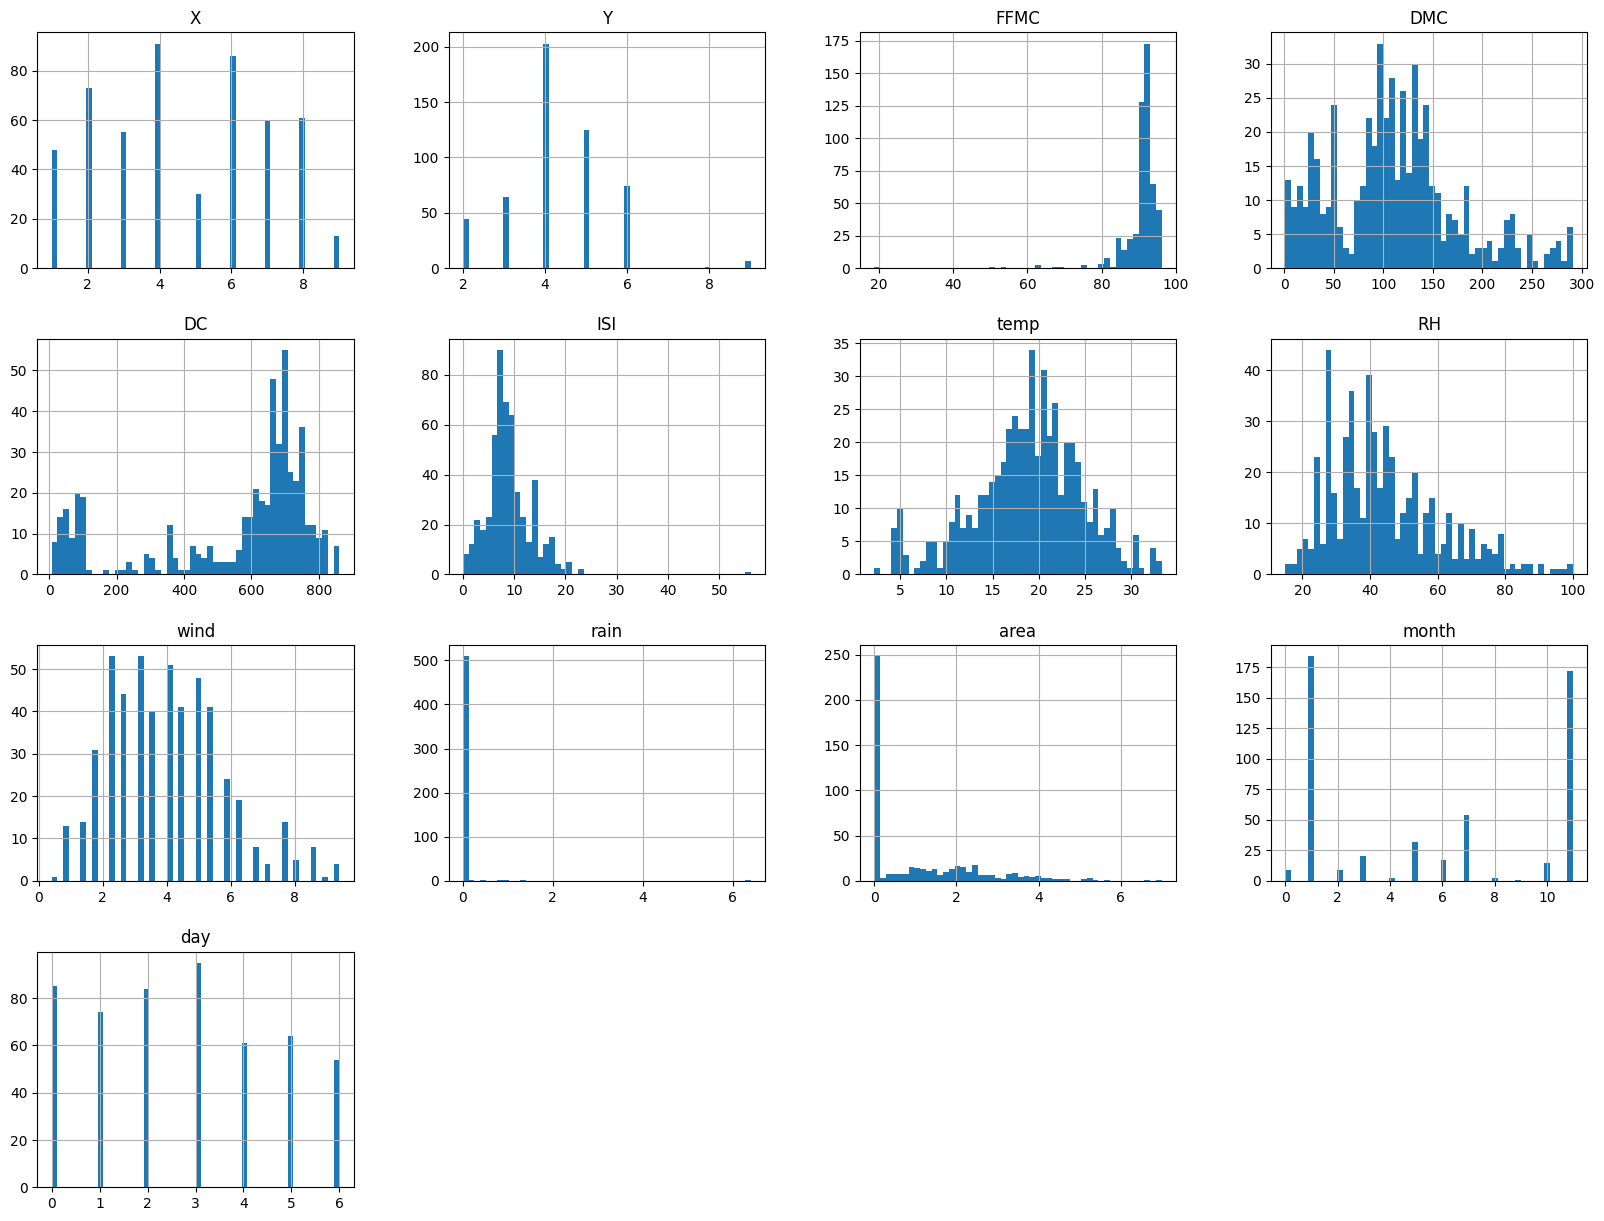

In [18]:
# # Histogram
data.hist(bins=50,figsize=(20,15))

#### * Histogram shows the frequency of respective headings at a particular input. The better the normalization curve the better the feature extraction.

<Axes: xlabel='month', ylabel='count'>

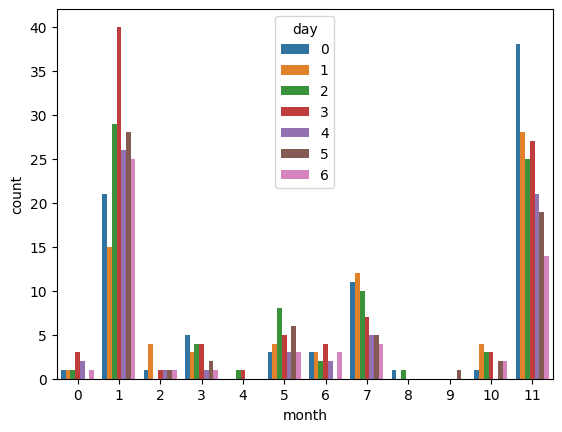

In [19]:
import seaborn as sns
sns.countplot(x='month', hue='day',data=data)

##### * From above barchart, we can conclude that "1: February" and "11: December" has most forest fire on "3: Wednesday" and "0: Sunday" respectively.

In [20]:
data.groupby('month')['day'].sum()

month
0      26
1     587
2      22
3      43
4       5
5      95
6      45
7     122
8       2
9       5
10     41
11    422
Name: day, dtype: int32

#### * February and December have 587 and 422 times of forest fire.

<Axes: xlabel='X', ylabel='Y'>

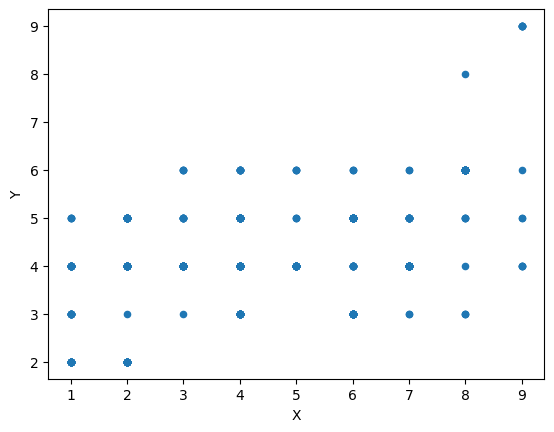

In [21]:
data.plot(kind='scatter',x='X',y='Y')

#### * X and Y are the coordinate of given park(map). The shown dots locates the area of destruction by fire.

Text(0, 0.5, 'Y-coordinate')

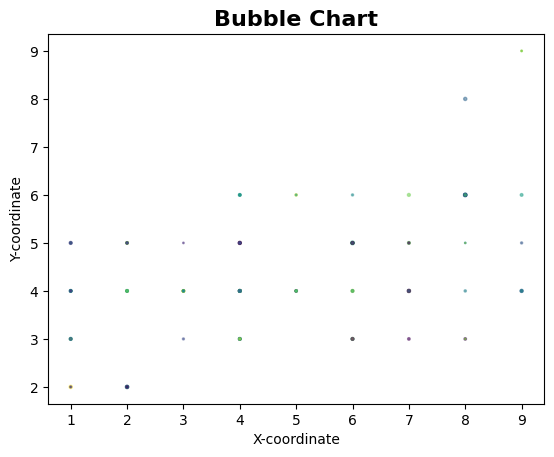

In [22]:
import matplotlib.pyplot as plt

# Create a figure and an axes object
fig, ax = plt.subplots()

# Generate the bubble chart using scatter plot
ax.scatter(data.X, data.Y, s=data.area, c = np.random.rand(517), alpha=0.5)

# Customize the chart
ax.set_title('Bubble Chart', fontsize=16, fontweight='bold')
ax.set_xlabel('X-coordinate')
ax.set_ylabel('Y-coordinate')

#### * Given bubble chart shows the most frequent damaged area by dark bubble dot and least damaged by light dot.

# 2.2 Feature Extraction

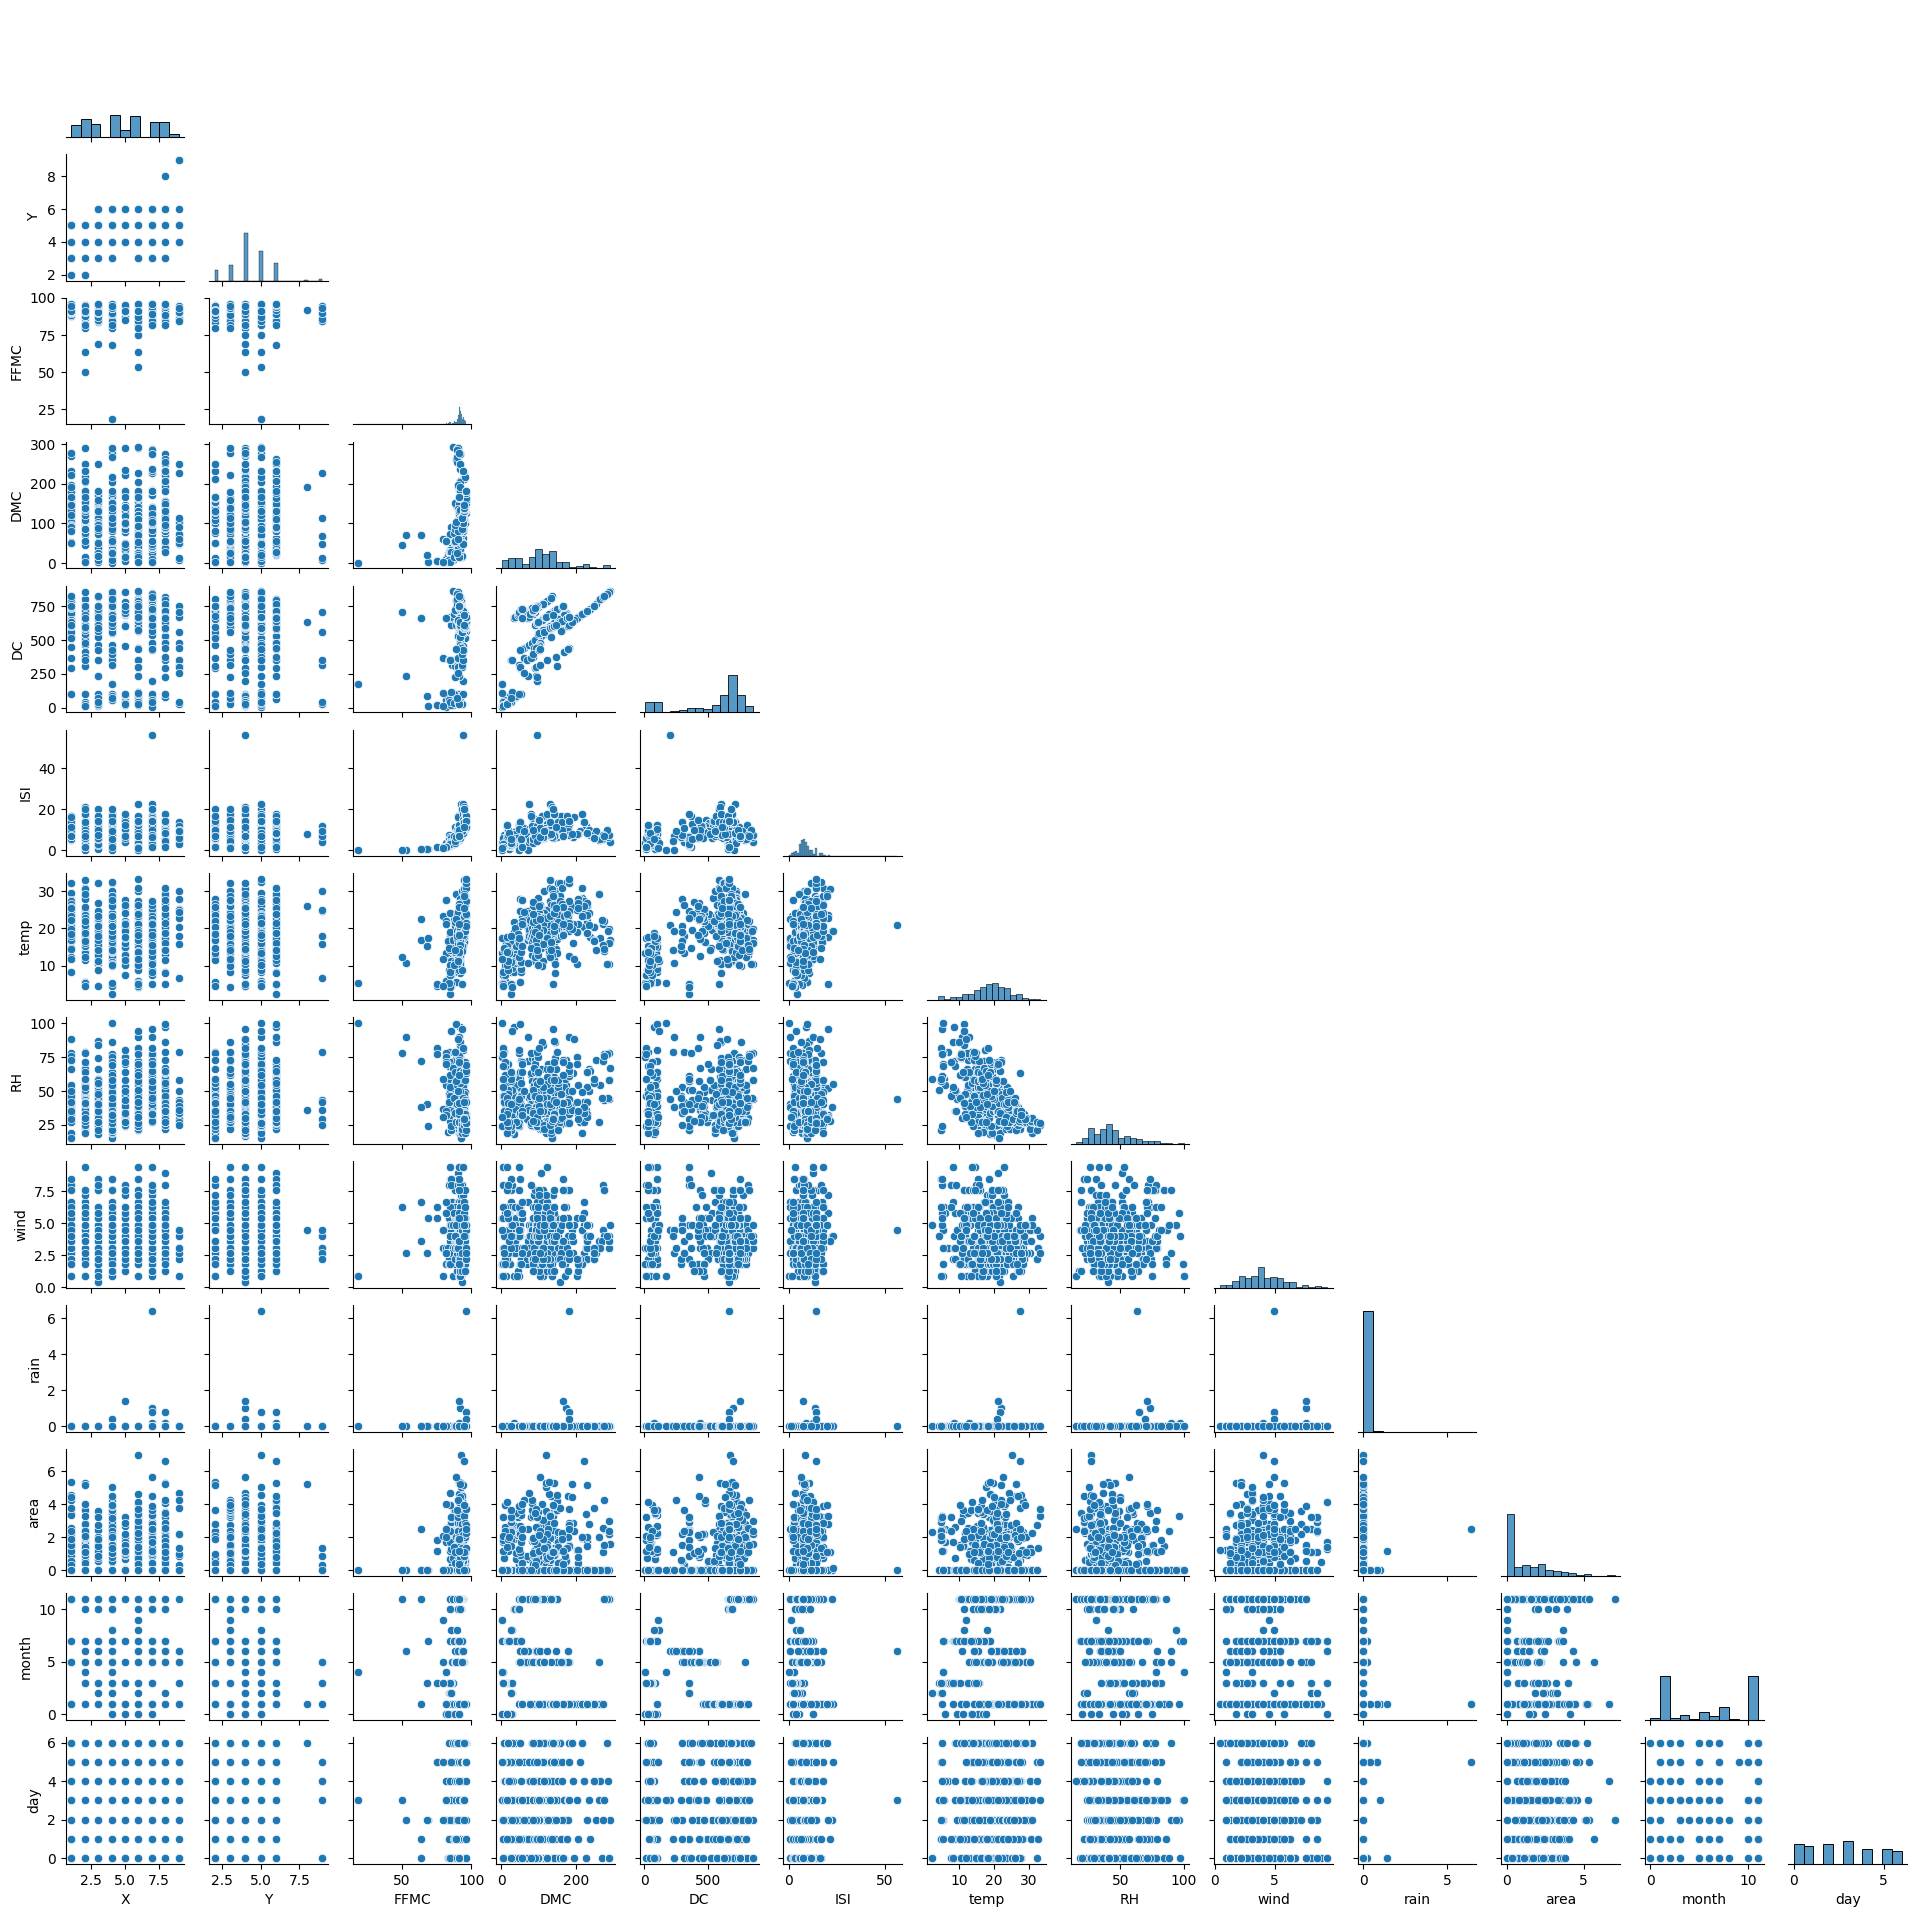

In [23]:
# # Pairplot over target variable
sns.pairplot(data,height=1.5,corner=True)

#### * Above shows a scatter plot between variables. Plot that has a clear line clusster shows better dependencies.
In scatterplot no single line can perfectly separate the data into respective class.
So, non-linear models like DecisionTree, RandomForest, etc. may give better result than linear models like LogisticRegression.

In [24]:
corr_matrix=data.corr()
correlation_values=corr_matrix['area'].sort_values(ascending=False)
print(correlation_values)

area     1.000000
DMC      0.067153
wind     0.066973
DC       0.066360
X        0.061995
temp     0.053487
FFMC     0.046799
month    0.039974
Y        0.038838
day      0.028812
rain     0.023311
ISI     -0.010347
RH      -0.053662
Name: area, dtype: float64


#### * Above shows the correlation of different variables with area(forest-fire).

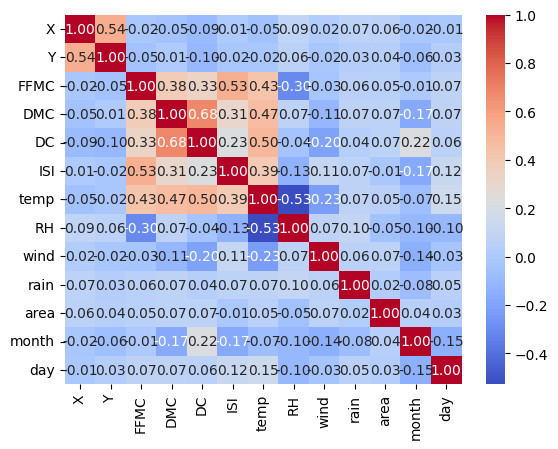

In [25]:
# Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm",fmt=".2f")

plt.show()

#### * The heatmap shows the corerealation of variables with each-other. Here the dark shaped color (red: directly proportional and dark blue: inversely proportional) symbolizes the greater dependencies. Meaning, variable with high correlation has a bigger impact on overall output.

#### * Hence, intersection of variables that has high correlation with area and between themselves are selected as input for creating prediction model.

array([[<Axes: xlabel='area', ylabel='area'>,
        <Axes: xlabel='DMC', ylabel='area'>,
        <Axes: xlabel='wind', ylabel='area'>,
        <Axes: xlabel='DC', ylabel='area'>,
        <Axes: xlabel='ISI', ylabel='area'>,
        <Axes: xlabel='RH', ylabel='area'>,
        <Axes: xlabel='temp', ylabel='area'>],
       [<Axes: xlabel='area', ylabel='DMC'>,
        <Axes: xlabel='DMC', ylabel='DMC'>,
        <Axes: xlabel='wind', ylabel='DMC'>,
        <Axes: xlabel='DC', ylabel='DMC'>,
        <Axes: xlabel='ISI', ylabel='DMC'>,
        <Axes: xlabel='RH', ylabel='DMC'>,
        <Axes: xlabel='temp', ylabel='DMC'>],
       [<Axes: xlabel='area', ylabel='wind'>,
        <Axes: xlabel='DMC', ylabel='wind'>,
        <Axes: xlabel='wind', ylabel='wind'>,
        <Axes: xlabel='DC', ylabel='wind'>,
        <Axes: xlabel='ISI', ylabel='wind'>,
        <Axes: xlabel='RH', ylabel='wind'>,
        <Axes: xlabel='temp', ylabel='wind'>],
       [<Axes: xlabel='area', ylabel='DC'>,
        <Axe

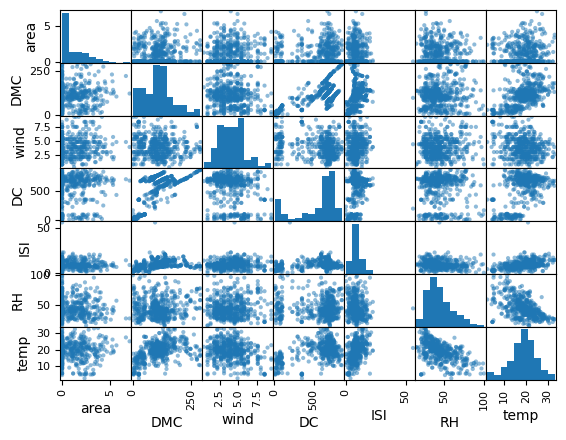

In [26]:
from pandas.plotting import scatter_matrix
attributes=['area','DMC','wind','DC','ISI','RH','temp']
scatter_matrix(data[attributes])

#### * Scatter plot helps to visualize the correlation between important variables.

<Axes: xlabel='DMC', ylabel='DC'>

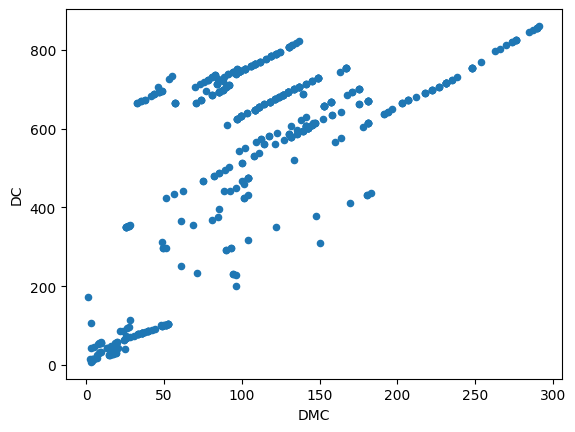

In [27]:
data.plot(kind='scatter',x='DMC',y='DC')

#### * An example (zoomed) for scatter plot visualization between two important variables (DC and DMC).

### Conclusion drawn from Data Exploration

In [28]:
# So, we will be using following variables as independent variables for our model.
data=data[['area','DMC','wind','DC','ISI','RH']]
data.head()

,area,DMC,wind,DC,ISI,RH
0,0.0,26.2,6.7,94.3,5.1,51
1,0.0,35.4,0.9,669.1,6.7,33
2,0.0,43.7,1.3,686.9,6.7,33
3,0.0,33.3,4.0,77.5,9.0,97
4,0.0,51.3,1.8,102.2,9.6,99


# 3. Training and Testing Model

#### * First separaring given data into features and labels

In [29]:
x=data.drop('area',axis=1) # Feature
y=data['area'] # Lable

#### * Now splitting datasets into Train-Test data

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train

,DMC,wind,DC,ISI,RH
329,102.3,4.0,751.5,8.4,27
173,126.5,2.2,686.5,7.0,39
272,152.6,4.0,658.2,14.3,47
497,181.1,2.2,671.2,14.3,27
182,15.6,2.2,48.3,3.9,53
...,...,...,...,...,...
71,85.1,3.6,692.3,15.9,37
106,30.7,3.1,74.3,7.5,29
270,152.6,3.1,658.2,14.3,56
435,84.7,1.8,376.6,5.6,51


In [31]:
# del data,x,y # to free up memory usage

In [32]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#### * Data scaling in required to bring data's close to each other implying better prediction.

# 3.1 Train and Evaluation function
Two function are required:
1. To adjust hyper-parameters and passes best parameters
2. To evaluate errors

In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [34]:
def trainn(x_train,y_train,model,hyperparameters): # this function returns best model and perform grid search with cross-validation
    grid_search=GridSearchCV(estimator=model, param_grid=hyperparameters, cv=5) # CV 5 allows to check in every train data 5 times and throws an average error (average MSE) from which the best combination of hyperparameters is selected.
    grid_search.fit(x_train,y_train)
    
    # Print the best hyperparameters found
    best_params = grid_search.best_params_
    print('best hyperparameters: ',best_params)
    
    # Train the model with best hyperparameters
    best_model=model.set_params(**best_params)
    best_model.fit(x_train,y_train)
    
    return best_params,best_model

def evaluate_model(x_test, y_test, best_model):
    # measure with test data
    # returns rmse score
    
    # prediction of test set
    y_pred=best_model.predict(x_test)
    
    # calculate evaluation metrics
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    print('rmse scores: ',rmse)
    mae=mean_absolute_error(y_test,y_pred)
    print('mean absolute error scores: ',rmse)
    r2_score=metrics.r2_score(y_test,y_pred)
    print('r2 scores: ',r2_score)   # r2_score=1 means better model

def another_evaluation_way(x_test, y_test, best_model):
    scores=cross_val_score(best_model,x_test,y_test,scoring='neg_mean_squared_error',cv=10)
    rmse=np.sqrt(-scores)

    #     print('rmse scores: ',rmse)
    print('rmse with CV mean: ',rmse.mean())
    print('rmse with CV standard deviation: ',rmse.std())

#### * Another way of evauating error is to include cross-validation for precise evaluation.

# We have following regression models to predict:

## i) Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [36]:
hyperparameters={
    'copy_X': [True,False],
    'fit_intercept': [True,False],
    'n_jobs': [-1,1,2],
}
model=LinearRegression()
_,best_model1 = trainn(x_train, y_train, model, hyperparameters)
evaluate_model(x_test, y_test, best_model1)
another_evaluation_way(x_test, y_test, best_model1)


best hyperparameters:  {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1}
rmse scores:  1.4711396971813355
mean absolute error scores:  1.4711396971813355
r2 scores:  0.01529193840615295
rmse with CV mean:  1.446224278280357
rmse with CV standard deviation:  0.3562629737674493


# ii) Ridge Regression

In [37]:
hyperparameters={
    'alpha': [1],
    'solver': ["cholesky"],
    'fit_intercept': [False],
}
model=Ridge()
_,best_model2 = trainn(x_train, y_train, model, hyperparameters)
evaluate_model(x_test, y_test, best_model2)
another_evaluation_way(x_test, y_test, best_model2)

best hyperparameters:  {'alpha': 1, 'fit_intercept': False, 'solver': 'cholesky'}
rmse scores:  1.8814868679399452
mean absolute error scores:  1.8814868679399452
r2 scores:  -0.6106532270562128
rmse with CV mean:  1.8525051096557577
rmse with CV standard deviation:  0.4380370868125731


# iii) Lasso Regression

In [38]:
hyperparameters={
    'alpha': [0.1],
    'fit_intercept': [False],
}
model=Lasso()
_,best_model3 = trainn(x_train, y_train, model, hyperparameters)
evaluate_model(x_test, y_test, best_model3)
another_evaluation_way(x_test, y_test, best_model3)

best hyperparameters:  {'alpha': 0.1, 'fit_intercept': False}
rmse scores:  1.8732941344615748
mean absolute error scores:  1.8732941344615748
r2 scores:  -0.5966569315622496
rmse with CV mean:  1.8523678342738013
rmse with CV standard deviation:  0.43443438704144266


# iv) ElasticNet

In [39]:
hyperparameters={
    'alpha': [0.1],
    'fit_intercept': [True],
    'l1_ratio': [0.5]
}
model=ElasticNet()
_,best_model4 = trainn(x_train, y_train, model, hyperparameters)
evaluate_model(x_test, y_test, best_model4)
another_evaluation_way(x_test, y_test, best_model4)

best hyperparameters:  {'alpha': 0.1, 'fit_intercept': True, 'l1_ratio': 0.5}
rmse scores:  1.4874868281122777
mean absolute error scores:  1.4874868281122777
r2 scores:  -0.006713567214305716
rmse with CV mean:  1.4445653902772198
rmse with CV standard deviation:  0.37363401405044167


## v) Decision Tree Regressor

In [40]:
hyperparameters={
    'max_depth': [2,3,4],
    'min_samples_split': [5,6,7,8,9,10,11,12,13,14],
}
model=DecisionTreeRegressor()
_,best_model5 = trainn(x_train, y_train, model, hyperparameters)
evaluate_model(x_test, y_test, best_model5)
another_evaluation_way(x_test, y_test, best_model5)

best hyperparameters:  {'max_depth': 2, 'min_samples_split': 5}
rmse scores:  1.4606564912320827
mean absolute error scores:  1.4606564912320827
r2 scores:  0.0292758142016718
rmse with CV mean:  1.4743997223929601
rmse with CV standard deviation:  0.345861459381486


## vi) Random Forest Regressor

In [41]:
hyperparameters={
    'n_estimators': [50,100,150,200,250],
    'max_depth': [2,3,4],
    'min_samples_split': [2,3,4,5],
}
model=RandomForestRegressor()
_,best_model6 = trainn(x_train, y_train, model, hyperparameters)
evaluate_model(x_test, y_test, best_model6)
another_evaluation_way(x_test, y_test, best_model6)

best hyperparameters:  {'max_depth': 2, 'min_samples_split': 5, 'n_estimators': 100}
rmse scores:  1.4749278352860806
mean absolute error scores:  1.4749278352860806
r2 scores:  0.010214225223953877
rmse with CV mean:  1.4393514688835245
rmse with CV standard deviation:  0.4313898183267685


# vii) KNeighborsRegressor

In [42]:
hyperparameters={
    'n_neighbors': [15,50,80],
    'weights': ['distance', 'uniform'],
    'leaf_size': [2,3,4,5],
}
model=KNeighborsRegressor()
_,best_model7 = trainn(x_train, y_train, model, hyperparameters)
evaluate_model(x_test, y_test, best_model7)
another_evaluation_way(x_test, y_test, best_model7)

best hyperparameters:  {'leaf_size': 3, 'n_neighbors': 80, 'weights': 'uniform'}
rmse scores:  1.513379562809997
mean absolute error scores:  1.513379562809997
r2 scores:  -0.04206640212380042
rmse with CV mean:  1.4566131824998743
rmse with CV standard deviation:  0.3785945257194844


# viii) SVR (Support Vector Regressor)

In [43]:
hyperparameters={
    'C': [5,15,36,50],
    'degree': [2,3,4],
    'epsilon': [2,3,4,5],
    'gamma': [2,3,4,5],
}
model=SVR()
_,best_model8 = trainn(x_train, y_train, model, hyperparameters)
evaluate_model(x_test, y_test, best_model8)
another_evaluation_way(x_test, y_test, best_model8)

best hyperparameters:  {'C': 36, 'degree': 2, 'epsilon': 2, 'gamma': 2}
rmse scores:  1.6760719961026933
mean absolute error scores:  1.6760719961026933
r2 scores:  -0.2781593578866628
rmse with CV mean:  1.757865633112004
rmse with CV standard deviation:  0.24419395968396007


# ix) Deep learning

In [44]:
from numpy import sqrt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# determine the number of input features
n_features = x_train.shape[1]

# define model
model9 = Sequential()
model9.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model9.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model9.add(Dense(1))

# compile the model
model9.compile(optimizer='adam', loss='mse')

# fit the model
model9.fit(x_train, y_train, epochs=150, batch_size=32, verbose=1)

# evaluate the model
error = model9.evaluate(x_test, y_test, verbose=1)
print(f'MSE: {error:.3f}, RMSE: {sqrt(error):.3f}')

Epoch 1/150
13/13 [==============================] - 1s 5ms/step - loss: 3.3980
Epoch 2/150
13/13 [==============================] - 0s 4ms/step - loss: 3.0933
Epoch 3/150
13/13 [==============================] - 0s 3ms/step - loss: 2.8665
Epoch 4/150
13/13 [==============================] - 0s 3ms/step - loss: 2.6880
Epoch 5/150
13/13 [==============================] - 0s 3ms/step - loss: 2.5540
Epoch 6/150
13/13 [==============================] - 0s 3ms/step - loss: 2.4518
Epoch 7/150
13/13 [==============================] - 0s 2ms/step - loss: 2.3749
Epoch 8/150
13/13 [==============================] - 0s 3ms/step - loss: 2.3074
Epoch 9/150
13/13 [==============================] - 0s 3ms/step - loss: 2.2607
Epoch 10/150
13/13 [==============================] - 0s 2ms/step - loss: 2.2212
Epoch 11/150
13/13 [==============================] - 0s 2ms/step - loss: 2.1836
Epoch 12/150
13/13 [==============================] - 0s 2ms/step - loss: 2.1571
Epoch 13/150
13/13 [=================

13/13 [==============================] - 0s 1ms/step - loss: 1.7224
Epoch 103/150
13/13 [==============================] - 0s 2ms/step - loss: 1.7232
Epoch 104/150
13/13 [==============================] - 0s 2ms/step - loss: 1.7211
Epoch 105/150
13/13 [==============================] - 0s 2ms/step - loss: 1.7209
Epoch 106/150
13/13 [==============================] - 0s 2ms/step - loss: 1.7177
Epoch 107/150
13/13 [==============================] - 0s 2ms/step - loss: 1.7179
Epoch 108/150
13/13 [==============================] - 0s 2ms/step - loss: 1.7161
Epoch 109/150
13/13 [==============================] - 0s 2ms/step - loss: 1.7164
Epoch 110/150
13/13 [==============================] - 0s 2ms/step - loss: 1.7123
Epoch 111/150
13/13 [==============================] - 0s 2ms/step - loss: 1.7118
Epoch 112/150
13/13 [==============================] - 0s 3ms/step - loss: 1.7111
Epoch 113/150
13/13 [==============================] - 0s 3ms/step - loss: 1.7099
Epoch 114/150
13/13 [=========

### Conclusion
Random Forest Regressor has minimum Rmse score of 1.418 and hence concluded as best model for this problem.

# 4. Prediction

In [45]:
# Real datas
features=x.iloc[-5:]
labels=y.iloc[-5:]
print(features)
real=np.exp(labels)-1

       DMC  wind     DC   ISI  RH
512   56.7   2.7  665.6   1.9  32
513   56.7   5.8  665.6   1.9  71
514   56.7   6.7  665.6   1.9  70
515  146.0   4.0  614.7  11.3  42
516    3.0   4.5  106.7   1.1  31


In [46]:
# Input and output calculated
# Model-1
raw_area1=best_model1.predict(features)
predicted_area1=(np.exp(raw_area1))-1
# Model -2
raw_area2=best_model2.predict(features)
predicted_area2=(np.exp(raw_area2))-1
# Model -3
raw_area3=best_model3.predict(features)
predicted_area3=(np.exp(raw_area3))-1
# Model -4
raw_area4=best_model4.predict(features)
predicted_area4=(np.exp(raw_area4))-1
# Model -5
raw_area5=best_model5.predict(features)
predicted_area5=(np.exp(raw_area5))-1
# Model -6
raw_area6=best_model6.predict(features)
predicted_area6=(np.exp(raw_area6))-1
# Model -7
raw_area7=best_model7.predict(features)
predicted_area7=(np.exp(raw_area7))-1
# Model -8
raw_area8=best_model8.predict(features)
predicted_area8=(np.exp(raw_area8))-1
# Deep_learning
raw_area9=model9.predict(features)
predicted_area9=(np.exp(raw_area9.flatten()))-1

C:\Users\ashim\Desktop\python\venv\reallyvirtual\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\ashim\Desktop\python\venv\reallyvirtual\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
C:\Users\ashim\Desktop\python\venv\reallyvirtual\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
C:\Users\ashim\Desktop\python\venv\reallyvirtual\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(
C:\Users\ashim\Desktop\python\venv\reallyvirtual\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\ashim\Desktop\python\venv\reallyvirtual\Lib\site-

1/1 [==============================] - 0s 108ms/step


C:\Users\ashim\AppData\Local\Temp\ipykernel_11384\2460976232.py:28: RuntimeWarning: overflow encountered in exp
  predicted_area9=(np.exp(raw_area9.flatten()))-1


In [47]:
table=pd.DataFrame({'actual_area':real,'Linear Regression_predicted': predicted_area1, 'Ridge Regression_predicted': predicted_area2, 'Lasso Regression_predicted': predicted_area3, 'ElasticNet_predicted': predicted_area4, 'Decision Tree Regressor_predicted': predicted_area5, 'Random Forest Regressor_predicted': predicted_area6, 'KNeighborsRegressor_predicted': predicted_area7, 'Support Vector Regressor_predicted': predicted_area8, 'Deep learning_predicted': predicted_area9})
table

,actual_area,Linear Regression_predicted,Ridge Regression_predicted,Lasso Regression_predicted,ElasticNet_predicted,Decision Tree Regressor_predicted,Random Forest Regressor_predicted,KNeighborsRegressor_predicted,Support Vector Regressor_predicted,Deep learning_predicted
512,6.44,2.837372e+09,1.135267e+09,4.291443,218.281109,1.900696,2.539553,2.547735,6.335046,inf
513,54.29,2.656706e+08,1.076541e+08,4.291443,218.281109,1.900696,2.539553,2.664385,6.335046,inf
514,11.16,3.043010e+08,1.232332e+08,4.291443,218.281109,1.900696,2.539553,2.664385,6.335046,inf
515,0.00,3.904074e+14,1.433701e+14,71.974551,187549.222740,1.900696,2.644161,2.036611,6.335046,inf
516,0.00,6.065827e+00,1.447799e+00,0.092155,2.782607,1.900696,2.419901,2.178375,6.335046,9.518130e+26


#### * Above shows the real affected areas for last datasets and their predicted outputs by the models.

### Scatter plot of real and predicted areas by model6 (Random Forest Regressor).

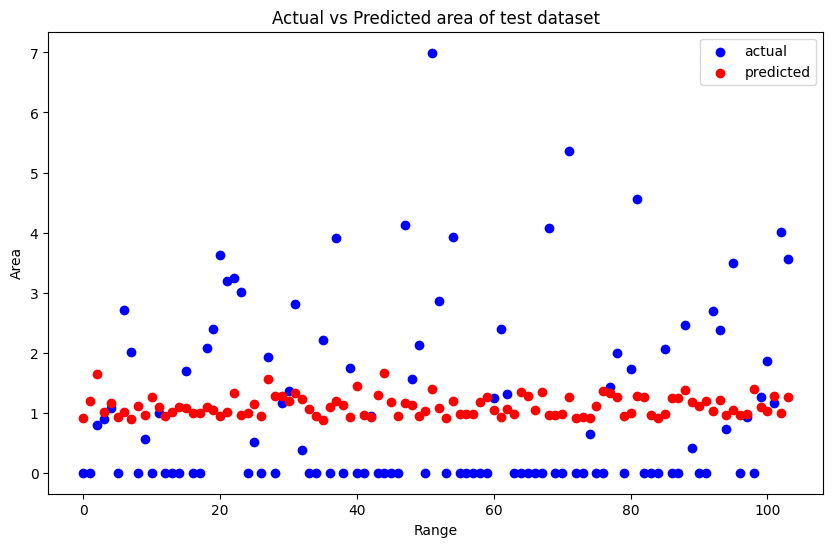

In [48]:
plt.figure(figsize=(10,6))
y_predict=best_model6.predict(x_test)
plt.scatter(range(len(y_test)),y_test,color='blue',label='actual')
plt.scatter(range(len(y_predict)),y_predict,color='red',label='predicted')
plt.xlabel('Range')
plt.ylabel('Area')
plt.title('Actual vs Predicted area of test dataset')
plt.legend()
plt.show()